040424 JD

Goal: Fitting has been done on `H66` cy3 for all FOVs. Now we will get some QC stats from the data to check

- problematic FOV
- performance across FOVs

chrom abb rounds:
- H65: cy3 (2)
- H66: A750 (0)
- H67: Cy5 (1)

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from ioMicro import *

In [2]:
save_folder ='/projects/ps-renlab2/wed009/analysis_031524_v1_acry_37C_pilot/'

# Spots detected

In [43]:
def get_spots_detected(iH, icol, plot = True):
    H_fits_fp = glob.glob(os.path.join(save_folder, f'*H{iH}*--col{icol}__Xhfits.npz'))
    H_Xh = [np.load(fits_fp)['Xh'] for fits_fp in H_fits_fp]
    H_Xh_len = [len(Xh) for Xh in H_Xh]
    
    # make bar graph
    if plot:
        plt.bar(range(len(H_Xh_len)), H_Xh_len)
        plt.xlabel('FOV')
        plt.ylabel('spots called')
        plt.title(f'H{iH}_col{icol} spots called')
    return H_Xh

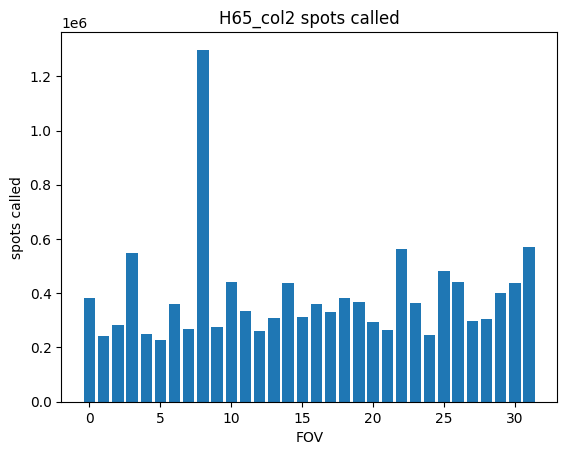

In [44]:
H65_Xh = get_spots_detected(iH = 65, icol = 2)

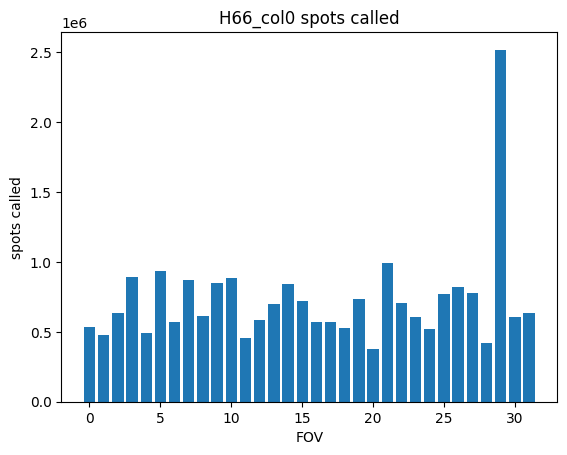

In [45]:
H66_Xh = get_spots_detected(iH = 66, icol = 0)

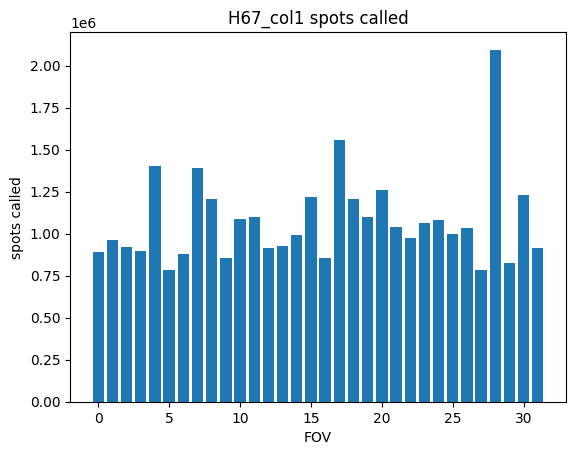

In [46]:
H67_Xh = get_spots_detected(iH = 67, icol = 1)

# plot the average intensity profile

In [62]:
def plot_intensity(Xh, iH, icol):
    H_per_fov = [np.mean(fov_Xh[:, -1]) for fov_Xh in Xh]
    plt.bar(range(len(Xh)), H_per_fov)
    plt.xlabel('FOV')
    plt.ylabel('Mean intensity profile')
    plt.title(f'H{iH}_col{icol} spots called')

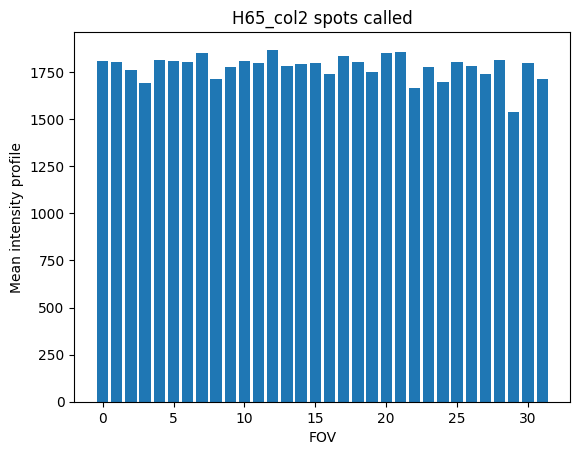

In [63]:
plot_intensity(Xh = H65_Xh, iH = 65, icol = 2)

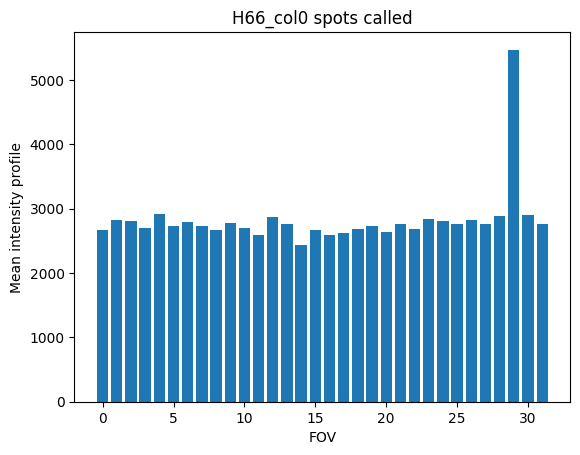

In [64]:
plot_intensity(Xh = H66_Xh, iH = 66, icol = 0)

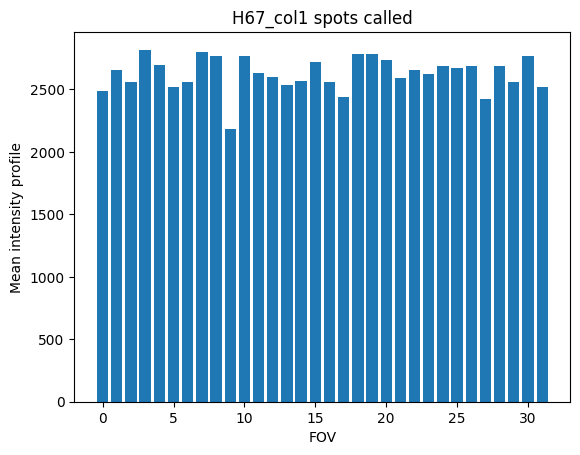

In [66]:
plot_intensity(Xh = H67_Xh, iH = 67, icol = 1)

# get max intensity

In [67]:
def average_of_top_ten(arr):
    # Ensure the array has at least 10 elements
    if len(arr) < 10:
        print("Array does not have enough elements.")
        return None
    # Find the top 10 values
    top_ten = np.sort(arr)[-10:]
    # Calculate the average
    return np.mean(top_ten)

def get_max_intensity(Xh, iH, icol):
    # Calculate the average for each array in the list
    H_max_avg = [average_of_top_ten(fov_Xh[:, -1]) for fov_Xh in Xh]
    return H_max_avg

In [72]:
np.mean(get_max_intensity(Xh = H65_Xh, iH = 65, icol = 2))

89073.31

In [71]:
np.mean(get_max_intensity(Xh = H66_Xh, iH = 66, icol = 0))

240548.7

In [73]:
np.mean(get_max_intensity(Xh = H67_Xh, iH = 67, icol = 1))

293228.94

In [ ]:
10, 25, 30